# ETHICAL - SATTA
## Predicting first innings cricket score

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### 'ipl.csv' contains ball-by-ball details of all the IPL matches from 2008 till 2017

In [2]:
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [4]:
df.shape

(76014, 15)

We have 76014 number of rows and 
Given data have all the details of that match

In [5]:
# Getting all colummn names
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
# few column do not have much impact of prediction , we can remove these to make model simple and robust
less_useful_columns = ['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels =less_useful_columns, axis = 1 , inplace = True) 

In [7]:
# Now less important columns has been deleted
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### We will consider only those teams which are regular part of the IPL

In [8]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
regular_playing_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians',
                         'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [10]:
regular_playing_teams

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Sunrisers Hyderabad']

### Check if batting and bowling  both are in regular playing team

In [11]:
df = df[(df['bat_team'].isin(regular_playing_teams)) & (df['bowl_team'].isin(regular_playing_teams))]

In [12]:
# Shape of the data will reduce now
df.shape

(53811, 9)

In [13]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


## To predict score we must know score of atleast 5 overs


In [14]:
# filtering out those rows for which over is less than 5
df = df[df['overs']>=5.0]
df.shape

(40108, 9)

In [15]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [16]:
# List of unique batting team
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [17]:
# List of unique bowling team
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

## From given data we can analyze that data is time series data
### date will play key role in splitting the dataset

In [18]:
# We need only year information to divide data
# yy-mm-dd => int(yy)
df['date'] = df['date'].apply(lambda x:int(x.split('-')[0]))

In [19]:
df['date'].head()

32    2008
33    2008
34    2008
35    2008
36    2008
Name: date, dtype: int64

In [20]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


## Onehot Encoding
### Categorical features must be encoded becauase ML algorithms is based on distance


In [21]:
# Encoding all the batting teams and bowling teams
df = pd.get_dummies(data = df , columns = ['bat_team','bowl_team'])

In [23]:
df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [25]:
df.shape


(40108, 23)

Number of columns arae increased

## Splitting the data 
### Training set : Before 2016 and Test set : After 2016

In [26]:
# Dropping dependent variable 
X_train = df.drop(labels='total',axis=1)[df['date']<=2016]
X_test = df.drop(labels='total',axis=1)[df['date']>=2017]

In [27]:
X_test.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,2017,46,1,5.1,42,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68895,2017,50,1,5.2,46,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68896,2017,50,1,5.3,44,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68897,2017,54,1,5.4,48,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68898,2017,58,1,5.5,51,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [36]:
X_test.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [37]:
# depentent variable
Y_train = df[df['date']<=2016]['total'].values
Y_test = df[df['date']>=2017]['total'].values

In [38]:
Y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [39]:
# Now date will not play any role in prediction 
# Simply remove them
X_train.drop(labels='date',axis=1,inplace=True)
X_test.drop(labels='date',axis=1,inplace=True)

In [40]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
X_train.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

## Prediction using Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
prediction = lin_reg.predict(X_test)

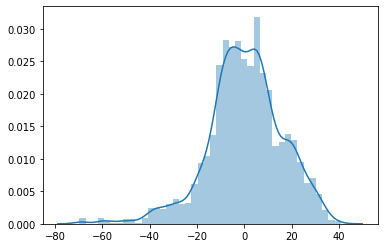

In [34]:
sns.distplot(Y_test-prediction)

Results seems to be pretty good, because it's like left skewed Gaussion Distribution

## Performance measurement

In [35]:
from sklearn import metrics
print("MAE : ",metrics.mean_absolute_error(Y_test,prediction))
print("MSE : ",metrics.mean_squared_error(Y_test,prediction))
print("SMSE : ",pow(metrics.mean_absolute_error(Y_test,prediction),0.5))
print('R-squared : ', metrics.r2_score(Y_test,prediction))

MAE :  12.118617546193244
MSE :  251.0079231041728
SMSE :  3.481180481703476
R-squared :  0.7522633566350543


In [36]:
from sklearn.model_selection import cross_val_score as cvs
np.mean(cvs(lin_reg,X_test,Y_test,scoring="neg_mean_squared_error",cv=5))

-549.4177116581457

In [37]:
newdata = np.array([[55]+[1]+[5.0]+[55]+[1]+[0]+[0]+[0]+[1]+[0]+[0]+[0]+[0]+[0]+[0]+[0]+[0]+[1]+[0]])
print(X_test.shape,newdata.shape)

(2778, 19) (1, 19)


In [38]:
newPred = lin_reg.predict(newdata)
int(newPred)

183

## Using Linear Regression we are getting R-squared score of 0.7522 which is pretty good

# Using Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {
    'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,30,35,40,45,50,55,100,150,200]
}
ridge_reg = GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_reg.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
ridge_reg.best_params_

{'alpha': 200}

In [41]:
ridge_reg.best_estimator_

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
ridge_reg.best_score_

-327.1165680360442

In [43]:
ridge_reg = Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

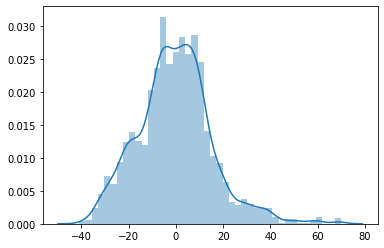

In [45]:
prediction = ridge_reg.predict(X_test)
sns.distplot(prediction-Y_test)

In [46]:
newdata = np.array([[55]+[1]+[5.0]+[55]+[1]+[0]+[0]+[0]+[1]+[0]+[0]+[0]+[0]+[0]+[0]+[0]+[0]+[1]+[0]])
print(X_test.shape,newdata.shape)
newPred = lin_reg.predict(newdata)
int(newPred)

(2778, 19) (1, 19)


183

In [47]:
from sklearn import metrics
print("MAE : ",metrics.mean_absolute_error(Y_test,prediction))
print("MSE : ",metrics.mean_squared_error(Y_test,prediction))
print("SMSE : ",pow(metrics.mean_absolute_error(Y_test,prediction),0.5))
print('R-squared : ', metrics.r2_score(Y_test,prediction))

MAE :  12.111588449319806
MSE :  251.05264844767416
SMSE :  3.4801707500235968
R-squared :  0.7522192141779742


In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params = {
    'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1e-1,1,5,10,15,20,30,35,40,45,50,55,100,150,200]
}
lasso_reg = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_reg.fit(X_train,Y_train)

C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4535718.27995458, tolerance: 2529.9556965945626
  positive)
C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4476797.032489262, tolerance: 2547.0380710286627
  positive)
C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4522861.553789844, tolerance: 2667.8126904366463
  positive)
C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 0.1,
                                   1, 5, 10, 15, 20, 30, 35, 40, 45, 50, 55,
                                   100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [47]:
lasso_reg.best_params_

{'alpha': 1}

In [48]:
lasso_reg.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [49]:
lasso_reg.best_score_

-320.82214916809124

In [50]:
lasso_reg= Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

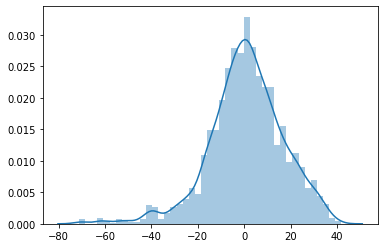

In [51]:
prediction = lasso_reg.predict(X_test)
sns.distplot(Y_test-prediction)

In [52]:
from sklearn import metrics
print("MAE : ",metrics.mean_absolute_error(Y_test,prediction))
print("MSE : ",metrics.mean_squared_error(Y_test,prediction))
print("SMSE : ",pow(metrics.mean_absolute_error(Y_test,prediction),0.5))
print('R-squared : ', metrics.r2_score(Y_test,prediction))

MAE :  12.213583996827493
MSE :  262.3653827960697
SMSE :  3.4947938418206435
R-squared :  0.74105391389545


 # Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
random_reg = RandomForestRegressor(n_estimators=10 , random_state=0)
params = {
    'n_estimators':[5,7,9,10],
    'max_depth':[1,2,3,4],
    'max_leaf_nodes':[None,2,3],
    }
random_reg = GridSearchCV(random_reg,params,scoring="neg_mean_squared_error",cv=5)
random_reg.fit(X_train,Y_train)

In [ ]:
random_reg.best_params_

In [ ]:
random_reg.best_score_

In [ ]:
random_reg.best_estimator_

In [ ]:
random_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
random_reg.fit(X_train,Y_train)
prediction = random_reg.predict(X_test)

In [ ]:
sns.distplot(prediction-Y_test)

Very poor prediction

In [ ]:
from sklearn import metrics
print("MAE : ",metrics.mean_absolute_error(Y_test,prediction))
print("MSE : ",metrics.mean_squared_error(Y_test,prediction))
print("SMSE : ",pow(metrics.mean_absolute_error(Y_test,prediction),0.5))
print('R-squared : ', metrics.r2_score(Y_test,prediction))

## Aftere analyzing all model,  Ridge Regression is better than all